# Neural Network Assignment
Team Members: <br>
Swetha Suresh Kumar (324353) <br>
Andra Umoru (324334)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlite3 import Time

af=int(input('Enter the activation Function: \n1.Sigmoid \n2.Hyperbolic Tangent \nChoice: '))

class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 1
        self.outputSize = 1
        self.hiddenSize = int(input('HiddenSize:'))
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) 
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 
                
        print(self.W1)
        print(self.W2)

    def feedForward(self, X,af):
        #forward propogation through the network
        self.z = np.dot(X, self.W1)  
        
        if(af==1):
            self.z2 = self.sigmoid(self.z) #sigmoid activation function
            self.z3 = np.dot(self.z2, self.W2) 
            output = self.sigmoid(self.z3)
        elif(af==2):
            self.z2 = self.tanh(self.z) #tanh activation function
            self.z3 = np.dot(self.z2, self.W2) 
            output = self.tanh(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def tanh(self, s, deriv=False):
        if (deriv == True):
            return 1 - (np.exp(s) - np.exp(-s))/(np.exp(s) + np.exp(-s)) * (np.exp(s) - np.exp(-s))/(np.exp(s) + np.exp(-s))
        return (np.exp(s) - np.exp(-s))/(np.exp(s) + np.exp(-s))
    
    def backward(self, X, y, output,lr,af):
        
        L_rate= lr
        #backward propogate through the network
        self.output_error = y - output 
        
        if(af==1):
            self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
            self.z2_error = self.output_delta.dot(self.W2.T) 
            self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        elif(af==2):
            self.output_delta = self.output_error * self.tanh(output, deriv=True)
            self.z2_error = self.output_delta.dot(self.W2.T) 
            self.z2_delta = self.z2_error * self.tanh(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
            
        self.W1 += X.T.dot(self.z2_delta) * lr 
        self.W2 += self.z2.T.dot(self.output_delta) * lr 
        
       
    def train(self, X, y,lr,af):    
        output = self.feedForward(X,af)
        self.backward(X, y, output,lr,af)

    def test(self, X, y,lr,af):
        output = self.feedForward(X,af)
        self.backward(X, y, output,lr,af)
       
        
NN = NeuralNetwork()

Enter the activation Function: 
1.Sigmoid 
2.Hyperbolic Tangent 
Choice: 1
HiddenSize:3
[[ 0.30472462 -0.36834067  0.88897715]]
[[ 0.796519  ]
 [-1.03575217]
 [ 0.27844279]]


# Train Dataset visualization

In [2]:
train_file_name = 'MacBookProo.csv'
batch_size = int(input('Batch_size:'))
train_ip = pd.read_csv(train_file_name)
#print(type(train_ip['Execution Time'][0]))
train_ip.head()

train_ip["Execution Time"] = train_ip["Execution Time"].astype(float)
#print(type(train_ip['Execution Time'][0]))


Batch_size:100


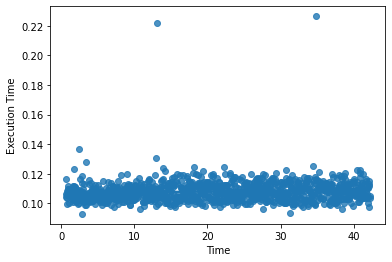

In [3]:
sns.regplot(x=train_ip['Time'], y=train_ip['Execution Time'], data=train_ip);


from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(train_ip[['Time']], train_ip[['Execution Time']], test_size=0.30,random_state=42)
# seggregate input and output
X = train_ip[['Time']] 
y = train_ip[['Execution Time']] 

# scale units
y=y/100

# Train dataset 

In [4]:
epoch=int(input('epoch:'))
batchsize=int(input('batchsize:'))
lr=float(input('Learning Rate: '))
for i in range(epoch): #trains the NN epoch times
    if (i % batchsize == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X,af)))))   
    NN.train(X, y, lr,af)

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))

epoch:100
batchsize:100
Learning Rate: 0.001
Loss: Execution Time    0.530644
dtype: float64
Input: 
          Time
0     0.616412
1     0.658079
2     0.699745
3     0.741412
4     0.783079
..         ...
995  42.074745
996  42.116412
997  42.158079
998  42.199745
999  42.241412

[1000 rows x 1 columns]
Actual Output: 
     Execution Time
0          0.001044
1          0.001168
2          0.001067
3          0.001035
4          0.000998
..              ...
995        0.001120
996        0.001154
997        0.000974
998        0.001049
999        0.001038

[1000 rows x 1 columns]


C:\Users\sweth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [5]:
#train dataset
Meva = np.square(y - NN.feedForward(X,af))
arr = np.array(Meva)
arr_mean = arr.flatten()
Meva = np.mean(arr_mean)

print("\nMean Loss value : " + str(Meva))
print("\n")
print("Predicted Output: \n" + str(NN.feedForward(X,af)))
XX = NN.feedForward(X,af)


Mean Loss value : 0.002017542189085267


Predicted Output: 
[[0.13263384]
 [0.13070352]
 [0.12881111]
 [0.12695658]
 [0.12513985]
 [0.12336076]
 [0.12161914]
 [0.11991474]
 [0.11824727]
 [0.1166164 ]
 [0.11502177]
 [0.11346298]
 [0.11193957]
 [0.11045109]
 [0.10899703]
 [0.10757687]
 [0.10619007]
 [0.10483607]
 [0.10351427]
 [0.10222409]
 [0.10096492]
 [0.09973613]
 [0.09853709]
 [0.09736719]
 [0.09622577]
 [0.09511221]
 [0.09402584]
 [0.09296605]
 [0.09193219]
 [0.09092362]
 [0.08993971]
 [0.08897985]
 [0.08804341]
 [0.08712978]
 [0.08623835]
 [0.08536855]
 [0.08451978]
 [0.08369146]
 [0.08288304]
 [0.08209397]
 [0.0813237 ]
 [0.0805717 ]
 [0.07983746]
 [0.07912047]
 [0.07842023]
 [0.07773627]
 [0.07706812]
 [0.07641532]
 [0.07577743]
 [0.07515401]
 [0.07454464]
 [0.07394891]
 [0.07336643]
 [0.0727968 ]
 [0.07223966]
 [0.07169465]
 [0.0711614 ]
 [0.07063959]
 [0.07012887]
 [0.06962893]
 [0.06913946]
 [0.06866015]
 [0.06819072]
 [0.06773088]
 [0.06728036]
 [0.06683891]
 [0.06640625]
 

# Mean error
Finding out error values, mean error, variance and standard deviation from the data sets with the help of numpy
functions and print out the output results

In [6]:
#Output array
arr = np.array(y)
arr_output = arr.flatten()

#predicted array
arr = np.array(NN.feedForward(X,af))
arr_prediction = arr.flatten()

#error calculation
error = arr_output - arr_prediction
#mean error
mean_error = np.mean(error);

#variance
variance = np.var(error)
stdeviation  = np.std(error, dtype=np.float64)


print("\nMean Errorvalue  : " + str(mean_error))
print("\nVariance : " + str(variance))
print("\nStandard Deviation : " + str(stdeviation))


Mean Errorvalue  : -0.042477326471393136

Variance : 0.00021321892492795139

Standard Deviation : 0.014602017837543939


# Train - Graph Input value and error
Find out error values, mean error, variance and standard deviation from the data sets with the help of numpy
functions and print out the output results

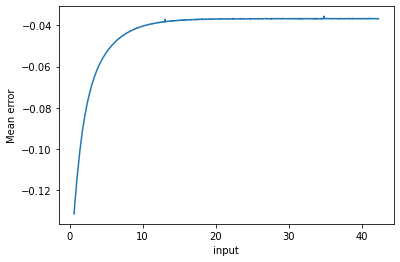

In [7]:
arr = np.array(X)
arr_input = arr.flatten()
plt.plot(arr_input,error)# plot the mean function.
plt.ylabel('Mean error')
plt.xlabel('input')
plt.show() 

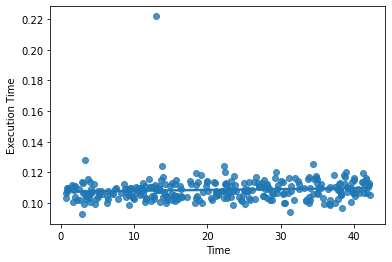

In [8]:
X = X_test.copy()
y = y_test.copy() 
sns.regplot(x=X['Time'], y=y['Execution Time'], data=train_ip);
# scale units
y=y/100

In [9]:
#test dataset
epoch=int(input('Epoch: '))
batchsize=int(input('Batch Size: '))
lr=float(input('Learning Rate: '))
for i in range(epoch): #test the NN epoch times
    if (i % batchsize == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X,af)))))   
    NN.train(X, y,lr,af)
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))

Epoch: 100
Batch Size: 100
Learning Rate: 0.001
Loss: Execution Time    0.002065
dtype: float64
Input: 
          Time
521  22.324745
737  31.324745
740  31.449745
660  28.116412
411  17.741412
..         ...
468  20.116412
935  39.574745
428  18.449745
7     0.908079
155   7.074745

[300 rows x 1 columns]
Actual Output: 
     Execution Time
521        0.001243
737        0.000939
740        0.001076
660        0.001030
411        0.001123
..              ...
468        0.001079
935        0.001096
428        0.001117
7          0.001095
155        0.001067

[300 rows x 1 columns]


C:\Users\sweth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Test dataset

In [10]:

Meva = np.square(y - NN.feedForward(X,af))
arr = np.array(Meva)
arr_mean = arr.flatten()
Meva = np.mean(arr_mean)
   
print("\nMean Loss value :  " + str(Meva))
print("\n")
print("Predicted Output: \n" + str(NN.feedForward(X,af)))


Mean Loss value :  0.0016001555104842944


Predicted Output: 
[[0.03311903]
 [0.03306138]
 [0.03306124]
 [0.0330678 ]
 [0.03331342]
 [0.03306569]
 [0.03307342]
 [0.03312573]
 [0.03305838]
 [0.04243226]
 [0.03305905]
 [0.05484724]
 [0.0330715 ]
 [0.03305777]
 [0.03305787]
 [0.03305806]
 [0.03446689]
 [0.03305817]
 [0.03306037]
 [0.03390481]
 [0.03310036]
 [0.03871335]
 [0.03348796]
 [0.03311444]
 [0.03657972]
 [0.03559574]
 [0.04820048]
 [0.03305774]
 [0.03305804]
 [0.03305784]
 [0.03365351]
 [0.04206229]
 [0.03307447]
 [0.03313928]
 [0.03349359]
 [0.0371808 ]
 [0.0330648 ]
 [0.0330848 ]
 [0.03305805]
 [0.0615399 ]
 [0.03381102]
 [0.04931098]
 [0.03398578]
 [0.03305776]
 [0.03415733]
 [0.03452321]
 [0.03305793]
 [0.03307944]
 [0.03323542]
 [0.03305864]
 [0.03309019]
 [0.0330582 ]
 [0.03486398]
 [0.03308699]
 [0.08820561]
 [0.0809941 ]
 [0.03307536]
 [0.10551801]
 [0.03610661]
 [0.03305889]
 [0.03420124]
 [0.06401471]
 [0.03310441]
 [0.03662624]
 [0.03307861]
 [0.03306435]
 [0.03306754]

In [11]:
#Output array
arr = np.array(y)
arr_output = arr.flatten()

#predicted array
arr = np.array(NN.feedForward(X,af))
arr_prediction = arr.flatten()

#error calculation
error = arr_output - arr_prediction
#mean error
mean_error = np.mean(error);

#variance
variance = np.var(error)
stdeviation  = np.std(error, dtype=np.float64)


print("\nMean Errorvalue  : " + str(mean_error))
print("\nVariance : " + str(variance))
print("\nStandard Deviation : " + str(stdeviation))


Mean Errorvalue  : -0.037380351845384276

Variance : 0.00020286480639957036

Standard Deviation : 0.014243061693314761


# Test - Graph Input value and Mean Error

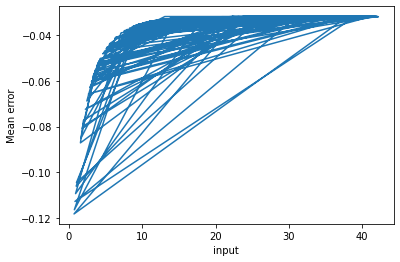

In [12]:
arr = np.array(X)
arr_input = arr.flatten()
plt.plot(arr_input,error)# plot the mean function.
plt.ylabel('Mean error')
plt.xlabel('input')
plt.show() 